<a href="https://colab.research.google.com/github/adenikeadewumi/EEE_254/blob/main/Ass5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bisecton method of getting the cube root of a number

In [37]:
#Importations
import time

In [48]:
#Take cube number form user
cube_num= int(input("Enter the cube number: "))


def cube_root(cube_num):
  start_time= time.time()
  # Find the number of digits in the cube number
  no_of_digits= len(str(cube_num))
  # Initialize counter and low to zero
  counter, low= 0, 0
  #abs_cube= abs(cube_num)
  high= cube_num
  is_negative= cube_num < 0
  #Set guess to the avg of high and low
  guess= (high+low)/2
  # define an epsion close to zero to check how close the guess**3 is to the actual cube number
  epsilon= 0.001
  # Use while loop to iterate through steps until guess**3 converges to cube_num
  while abs(guess**3 -cube_num) >= epsilon:
    #Use if-else to set a condition to check how to update high and low.
    # The nested if else is to take care of cases where our guess will be negative because cube_num is negative. Therefore the high is set to guess when guess**3 < cube number and low if it is > than the cube number
    if guess**3 < cube_num:
      if is_negative:
        high= guess
      else:
        low = guess
    else:
      if is_negative:
        low= guess
      else:
        high= guess
    # Calculate new guess
    guess= (high+low)/2
    #Increment counter
    counter+= 1
    #Get time taken
    end_time= time.time()
    total_time= end_time- start_time
  return guess, counter, no_of_digits, total_time

ans, steps, num_digit, total_time= cube_root(cube_num)
print(f"The cube root of {cube_num} is {ans}")
print(f"Number of steps taken: {steps}")
print(f"Total time taken: {total_time}")



Enter the cube number: 7838830
The cube root of 7838830 is 198.6477949862047
Number of steps taken: 46
Total time taken: 3.6716461181640625e-05


Plot of program's performance

In [49]:
#Define a function to get the number of points to be plotted to evaluate our program's performance
def get_points_graph(num_of_points):
  x= []
  y= []
  lst_total_time= []
  for i in range(num_of_points):
    cube_num= int(input("Enter the cube number: "))
    guess, counter, no_of_digits, total_time= cube_root(cube_num)
    x.append(no_of_digits)
    y.append(counter)
    lst_total_time.append(total_time)
  return x, y, lst_total_time




Enter the cube number: 83837
Enter the cube number: 73838368
Enter the cube number: 6383738
Enter the cube number: 839377897


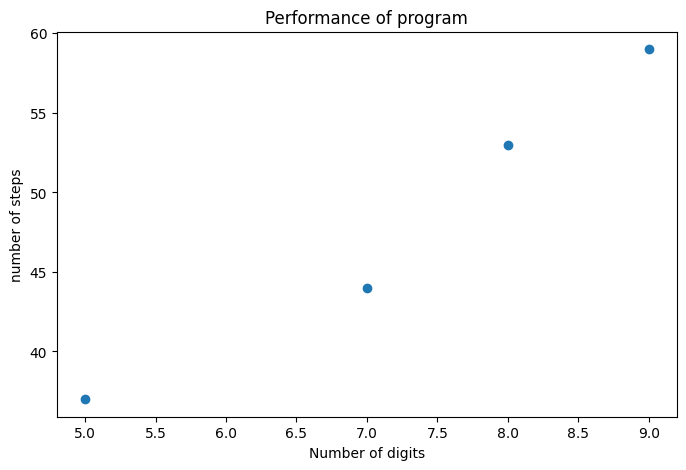

In [50]:
#Import visualization graphs
import matplotlib.pyplot as plt
import numpy as np

#Get the points
x,y, total_time = get_points_graph(4)
# Create a new figure
fig = plt.figure(figsize=(8,5))
#Convert points to arrays
x = np.array(x)
y = np.array(y)
#Label the grapgh
plt.xlabel("Number of digits")
plt.ylabel("number of steps")
plt.title("Performance of program")
# Now we plot the graph
plt.scatter(x, y)
#This must be added so the plot will show
plt.show()

Graph of time taken1415

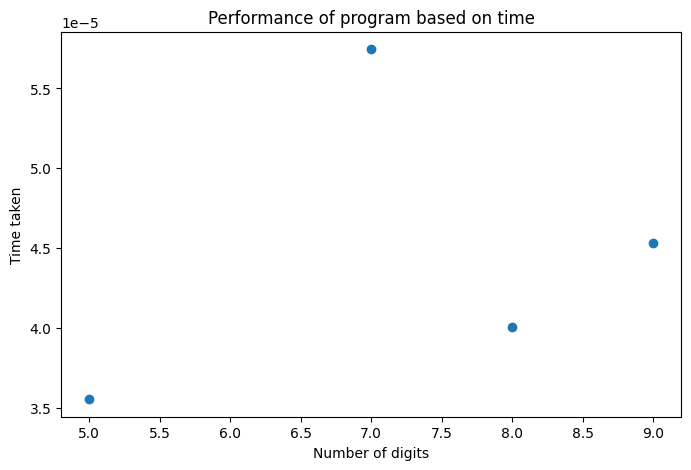

In [51]:
# Create a new figure
fig = plt.figure(figsize=(8,5))
#The x remains the same but now our y axis is the time taken
x = np.array(x)
total_time= np.array(total_time)
plt.xlabel("Number of digits")
plt.ylabel("Time taken")
plt.title("Performance of program based on time")
plt.scatter(x, total_time)
plt.show()

Test for primality using bisection method

In [52]:
#Create a function to check whether a num is prime or not using bisection method
def check_ifprime(num):
  #This function uses the bisection method to check for prime numbers
  smallest_divisor= 0
  primality= None
  # This check whether 2 is a divisor therefore we can jump and
  if num % 2 == 0:
    smallest_divisor= 2
  else:
    #Create a loop through the range of 3 while incrementing by two(since we already took care of all even numbers) such that we have 3,5, 7....
    for i in range(3, num, 2):
      if num% i ==0:
        smallest_divisor= i
        break
      else:
        break
  # if there is a divisor then the number is not prime
  if smallest_divisor!= 0:
    primality= False
  else:
    primality= True
    return primality

# Define a function that gets the prime numbers in a range of values
def get_prime_number(start_num, end_num):
  #define an empty list to store prime numbers in
  lst_prime_num= []
  #Loop through the given range and append the prime numbers to the list
  for i in range(start_num, end_num):
    primality= check_ifprime(i)
    if primality:
      lst_prime_num.append(i)

  return lst_prime_num
# Get the input range and get the sum of prime numbers in the range
start_num, end_num= int(input("Enter start num: ")), int(input("Enter end num: "))
lst_prime_num= get_prime_number(start_num, end_num)
print(f"List of prime numbers in range {start_num} to {end_num} is {lst_prime_num}")
print(f"Sum of prime num in range is {sum(lst_prime_num)}")

Enter start num: 3
Enter end num: 1000
List of prime numbers in range 3 to 1000 is [3, 5, 7, 11, 13, 17, 19, 23, 25, 29, 31, 35, 37, 41, 43, 47, 49, 53, 55, 59, 61, 65, 67, 71, 73, 77, 79, 83, 85, 89, 91, 95, 97, 101, 103, 107, 109, 113, 115, 119, 121, 125, 127, 131, 133, 137, 139, 143, 145, 149, 151, 155, 157, 161, 163, 167, 169, 173, 175, 179, 181, 185, 187, 191, 193, 197, 199, 203, 205, 209, 211, 215, 217, 221, 223, 227, 229, 233, 235, 239, 241, 245, 247, 251, 253, 257, 259, 263, 265, 269, 271, 275, 277, 281, 283, 287, 289, 293, 295, 299, 301, 305, 307, 311, 313, 317, 319, 323, 325, 329, 331, 335, 337, 341, 343, 347, 349, 353, 355, 359, 361, 365, 367, 371, 373, 377, 379, 383, 385, 389, 391, 395, 397, 401, 403, 407, 409, 413, 415, 419, 421, 425, 427, 431, 433, 437, 439, 443, 445, 449, 451, 455, 457, 461, 463, 467, 469, 473, 475, 479, 481, 485, 487, 491, 493, 497, 499, 503, 505, 509, 511, 515, 517, 521, 523, 527, 529, 533, 535, 539, 541, 545, 547, 551, 553, 557, 559, 563, 565, 569, 57